In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, datetime

First, we load speeches of years 2019 and 2020.

In [2]:
speeches = pd.read_feather('speeches_2019_2020.feather')

Then, we find length of each speech content and plot a histogram to see the distribution based on speech length.

In [15]:
speeches_len = speeches.speechContent.apply(lambda s: len(s))

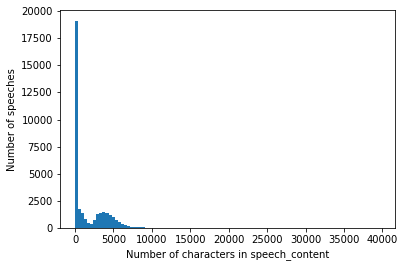

In [22]:
plt.hist(speeches_len, bins=100)
plt.xlabel('Number of characters in speech_content')
plt.ylabel('Number of speeches')
plt.savefig('images/speech.eps')
plt.show()

We see that more speeches are of length less than 500, so let's filter them out, and plot a histogram again.

In [23]:
new_speeches = speeches[speeches.speechContent.str.len() > 500]
new_speeches.shape

(15302, 12)

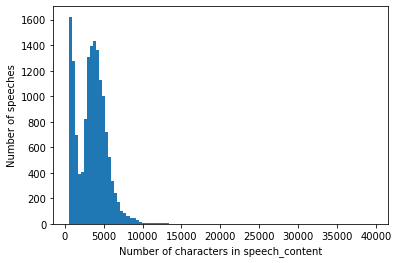

In [24]:
speeches_len = new_speeches.speechContent.apply(lambda s: len(s))
plt.hist(speeches_len, bins=100)
plt.xlabel('Number of characters in speech_content')
plt.ylabel('Number of speeches')
plt.savefig('images/speech_reduced.eps')
plt.show()

Now we merge speeches and politicians table then plot the count of each profession group.

In [76]:
people = pd.read_feather('politicians_cleaned_eng.feather')

In [77]:
speeches_people = pd.merge(speeches, people, left_on='politicianId', right_on="id")

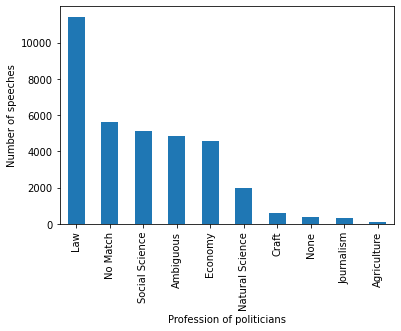

In [101]:
plt.figure()
plt.ylabel('Number of speeches')
plt.xlabel('Profession of politicians')
speeches_people.cleanedProfession.value_counts(dropna=False).plot.bar()
plt.savefig('images/profession.eps', bbox_inches='tight')

Then, we find the age of each politicians and do another histogram plot for each age, and we can see speeches are more in age between 60 - 70.

In [81]:
def get_age(born, speech_date):
    if born:
        born = datetime.strptime(born, '%Y-%m-%d')
        today = speech_date
        return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
    return None

In [82]:
speeches_people['age'] = speeches_people.apply(lambda x: get_age(x.birthDate, x.date), axis=1)

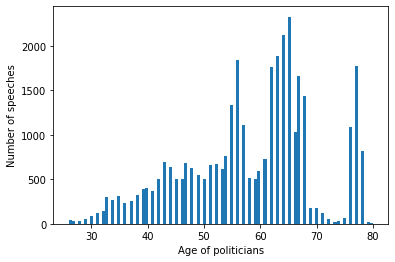

In [88]:
plt.figure()
plt.ylabel('Number of speeches')
plt.xlabel('Age of politicians')
speeches_people.age.hist(bins=100, grid=False)
plt.savefig('images/age.eps')

After that, we create greaderEng column and plot another plot to see the gender distribution.

In [103]:
def get_gender_eng(gender):
    if gender == 'männlich': return 'Male'
    if gender == 'weiblich': return 'Female'
    return 'Missing'

In [104]:
speeches_people['genderEng'] = speeches_people.apply(lambda x: get_gender_eng(x.gender), axis=1)

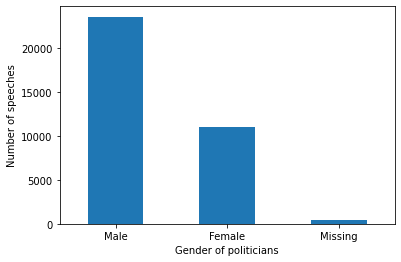

In [105]:
plt.figure()
plt.ylabel('Number of speeches')
plt.xlabel('Gender of politicians')
speeches_people.genderEng.value_counts().plot.bar(rot=0)
plt.savefig('images/gender.eps', bbox_inches='tight')

Finally, we merge factions table with speeches then see the distribution of speeches for each faction.

In [106]:
factions = pd.read_feather('factions.feather')

In [107]:
speeches_people_factions = pd.merge(speeches_people, factions, left_on='factionId', right_on="id")

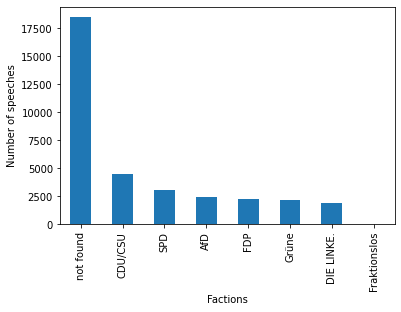

In [116]:
plt.figure()
plt.ylabel('Number of speeches')
plt.xlabel('Factions')
speeches_people_factions.abbreviation.value_counts().plot.bar()
plt.savefig('images/faction.eps', bbox_inches='tight')